In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
with open('/home/becode/Downloads/page_1.csv') as f:
    new_dict1 = pd.read_csv('/home/becode/Downloads/page_1.csv')
#new_dict = new_dict[new_dict['Type'] == 'house']
new_dict1 = new_dict1[new_dict1['Type'] == 'apartment']

#new_dict1.drop(["How many fireplaces?", "ID", 'Locality', 'Type'], axis=1, inplace = True)
new_dict= new_dict1[new_dict1['Price'] < 800000]

The dataset is filtered to give predictions only for apartments, with a price below 800 000

In [85]:
print("There are {} rows of data".format(len(new_dict)))

There are 5158 rows of data


### Removing the rows of the dataset with null values or 0

In [86]:
#new_dict = new_dict[new_dict.loc[:]!=0].dropna()
print("There are {} rows of data".format(len(new_dict)))
new_dict.head()

There are 5158 rows of data


,ID,Locality,Price,Bedrooms,Living area,Kitchen type,Furnished,How many fireplaces?,Terrace,Terrace surface,Garden,Garden surface,Surface of the plot,Number of frontages,Building condition,Type,Subtype,Type of sale
0,10166459,Oostende,275000.0,2.0,67.0,Not installed,No,0.0,Yes,13.0,No,0.0,67.0,0.0,To restore,apartment,apartment,none
2,10292307,Knokke,595000.0,2.0,94.0,Not installed,No,0.0,No,0.0,No,0.0,94.0,0.0,To restore,apartment,apartment,none
4,10124022,Knokke Heist,325000.0,2.0,66.0,Hyper equipped,Yes,0.0,Yes,0.0,No,0.0,66.0,2.0,Just renovated,apartment,apartment,none
7,10150713,Zeebrugge,229500.0,2.0,81.0,Not installed,Yes,0.0,Yes,8.0,No,0.0,81.0,0.0,As new,apartment,apartment,none
8,10058258,Knokke,148000.0,1.0,0.0,Not installed,No,0.0,No,0.0,Yes,0.0,0.0,4.0,As new,apartment,apartment,none


### Create Linear Regression Model, print scores

In [87]:
# Train the model
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer


# select the numeric columns and drop the y column 'Price'
numeric_features = new_dict.select_dtypes(include=['float64'])
numeric_features.drop('Price', axis=1, inplace=True)
numeric_transformer = Pipeline(steps=[('poly',PolynomialFeatures(degree =2)),
                                      ('scaler', StandardScaler())])
# select the categorical columns, place them in the pipeline to encode
categorical_features = new_dict.select_dtypes(include=['object']).columns.values
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# fit the pipeline to train a model
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features.columns.values),
        ('cat', categorical_transformer, categorical_features)])
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LinearRegression())])

X = new_dict.drop(['Price'], axis = 1)
y = new_dict['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, shuffle = False, random_state = 0)
clf.fit(X_train, y_train)

# Get The coefficients score
print(clf.score(X_train, y_train))
# place test values in the preprocessing pipeline 
clf.fit(X_test, y_test)
print(clf.score(X_test, y_test))

0.7049725401930814
0.7730818343291102


### Create RandomForestRegressor model, evaluate the model

0.9540834389461804
0.9620816830786091
MSE: 478758378.71103543
RMSE: 21880.547952714427
R2: 0.9620816830786091


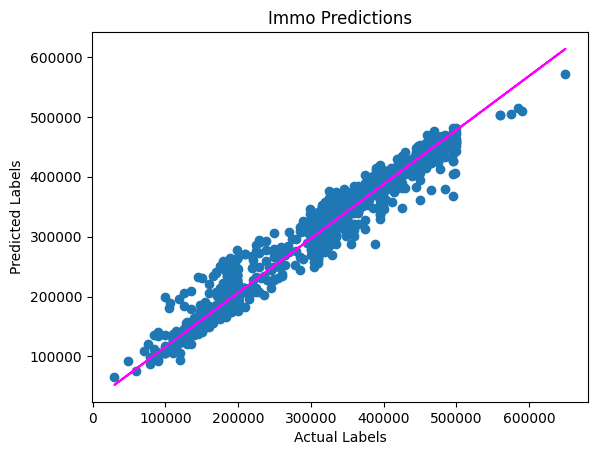

In [88]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

# Train the model
clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestRegressor())])
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
clf.fit(X_test, y_test)
print(clf.score(X_test, y_test))

# Evaluate the model using the test data
predictions = clf.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Immo Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

# Train other models with a fresh copy of the dataset

In [89]:
with open('/home/becode/Downloads/page_1.csv') as f:
    new_dict = pd.read_csv('/home/becode/Downloads/page_1.csv')

new_dict.drop(["How many fireplaces?", "ID", 'Locality'], axis=1, inplace = True)
new_dict= new_dict[new_dict['Price'] < 800000]

new_dict = new_dict[new_dict.loc[:]!=0].dropna()
# select the numeric columns and drop the y column 'Price'
numeric_features = new_dict.select_dtypes(include=['float64'])
numeric_features.drop('Price', axis=1, inplace=True)
numeric_transformer = Pipeline(steps=[('poly',PolynomialFeatures(degree =2)),
                                      ('scaler', StandardScaler())])
# select the categorical columns, place them in the pipeline to encode
categorical_features = new_dict.select_dtypes(include=['object']).columns.values
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# fit the pipeline to train a model
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features.columns.values),
        ('cat', categorical_transformer, categorical_features)])
X = new_dict.drop(['Price'], axis = 1)
y = new_dict['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

### Find what are the best values for RandomForestClassifier

In [90]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

param_grid = {'max_depth': [3, 5, 10],
              'min_samples_split': [2, 5, 10]}
base_estimator = RandomForestClassifier(random_state=0)
X, y = make_classification(n_samples=1000, random_state=0)
sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5,
                         factor=2, resource='n_estimators',
                         max_resources=30).fit(X, y)
sh.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=24, random_state=0)

### Create RandomForestClassifier model, get estimator score 

In [91]:

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(random_state=0, max_depth=5, n_estimators=24))])
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
clf.fit(X_test, y_test)
print(clf.score(X_test, y_test))


0.4161616161616162
0.6204819277108434
